In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# This is just generating data
n = 200
x = np.random.sample(n)*20
a = np.random.sample(n)*20 + 50

b = 3.5
y = b*x + a

# We don't add the random error to our dataset, in real life it is unknown
# We also don't know b apriori. b is exactly what we want to find
# And the 'expected value' of a
df = pd.DataFrame({'feature1':x})

(200, 2)


,feature1,target
0,16.751574,109.388463
1,15.351604,122.074320
2,14.479278,118.749390
3,18.751088,126.195187
4,11.887660,95.469918


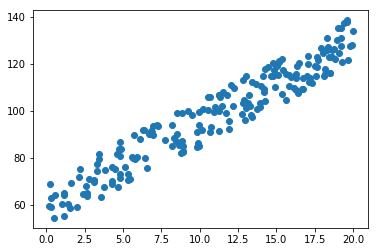

In [3]:
# Having a look at the data

df['target'] = y
fig, ax = plt.subplots()
ax.scatter(x,y)

print(df.shape)
df.head()

In [4]:
# Pre-processing
X = df.drop('target',axis=1)
y = df['target']

### Regression in [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [5]:
from sklearn.linear_model import LinearRegression

# Setting up the LEARNER
model_skl = LinearRegression(fit_intercept=True)

# Actually LEARNING
model_skl.fit(X,y)

# Evaluating performance
r2 = model_skl.score(X,y)
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# Understanding the LEARNED model
est_a = model_skl.intercept_
est_b = model_skl.coef_
print('constant: {}'.format(round(est_a,4)))
print('coeficients: real {} vs {} estimated'.format(b,est_b.round(4)))

R2 = 0.92
constant: 60.4477
coeficients: real 3.5 vs [3.4488] estimated


### Regression in [Statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) and its [Interpretation](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults)

In [6]:
import statsmodels.api as sm

# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.92
const       60.4477
feature1     3.4488
dtype: float64


### Statsmodels superpower

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2215.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          1.84e-109
Time:                        21:31:03   Log-Likelihood:                -639.15
No. Observations:                 200   AIC:                             1282.
Df Residuals:                     198   BIC:                             1289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.4477      0.909     66.512      0.000      58.655      62.240
feature1       3.4488      0.073     47.066      0.000       3.304       3.593
==============================================================================
Omnibus:                      103.154   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.444
Skew:                           0.042   Prob(JB):                      0.00199
Kurtosis:                       1.781   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""